✅ Dataset loaded successfully.
Shape: (984, 9)
        Image Index Finding Label     Bbox [x           y           w  \
0  00013118_008.png   Atelectasis  225.084746  547.019217   86.779661   
1  00014716_007.png   Atelectasis  686.101695  131.543498  185.491525   
2  00029817_009.png   Atelectasis  221.830508  317.053115  155.118644   
3  00014687_001.png   Atelectasis  726.237288  494.951420  141.016949   
4  00017877_001.png   Atelectasis  660.067797  569.780787  200.677966   

           h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0   79.186441         NaN         NaN         NaN  
1  313.491525         NaN         NaN         NaN  
2  216.949153         NaN         NaN         NaN  
3   55.322034         NaN         NaN         NaN  
4   78.101695         NaN         NaN         NaN   

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         -----------

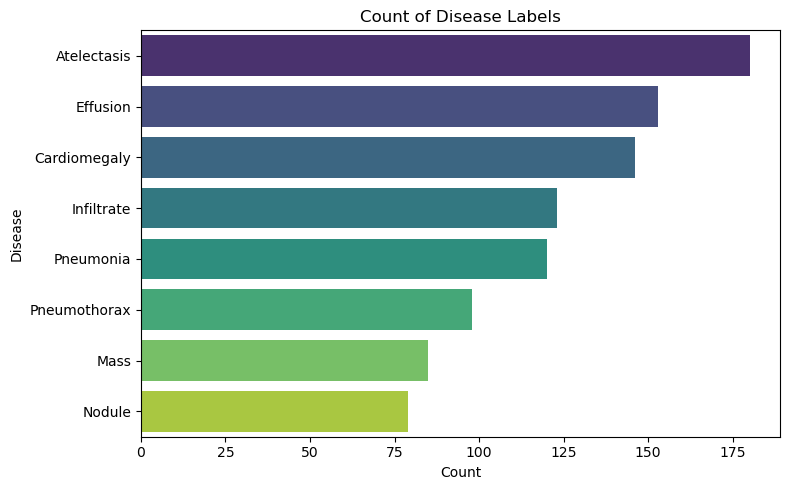

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


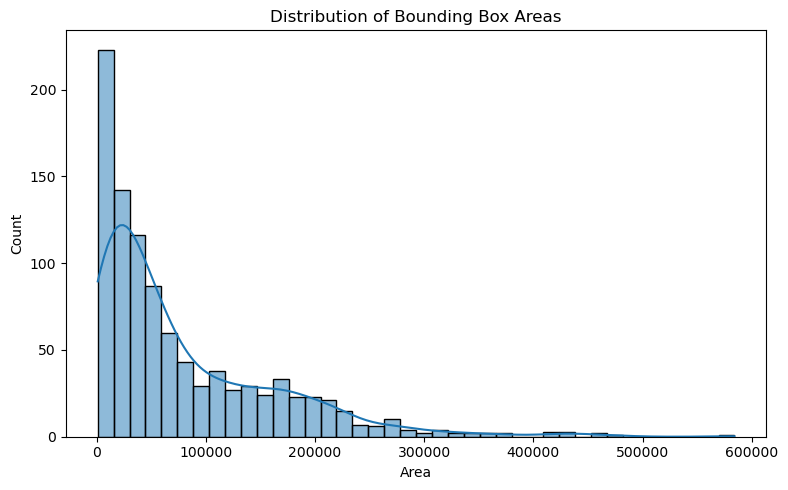

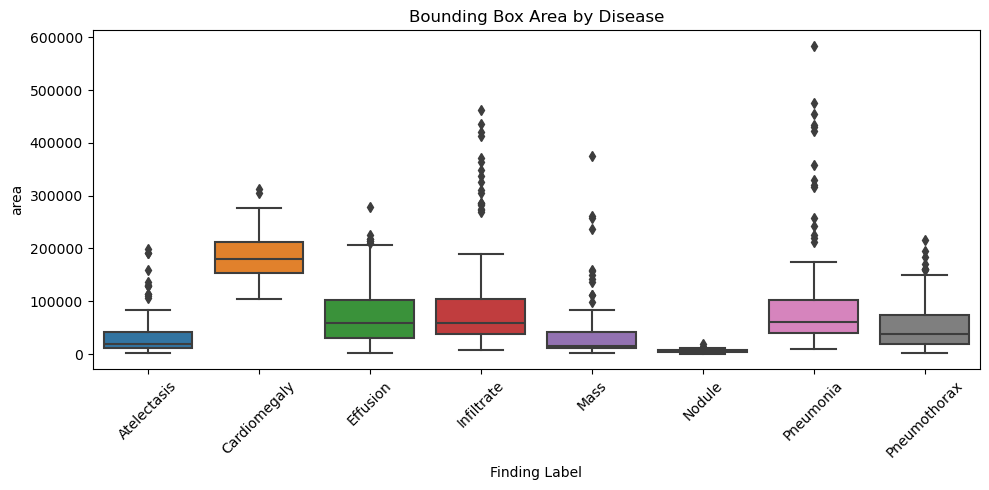

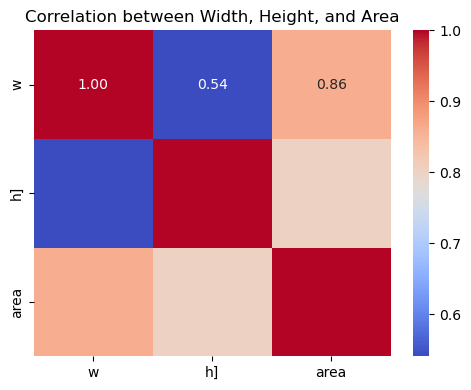

Large boxes: 473
Small boxes: 60
Images with multiple findings: 93



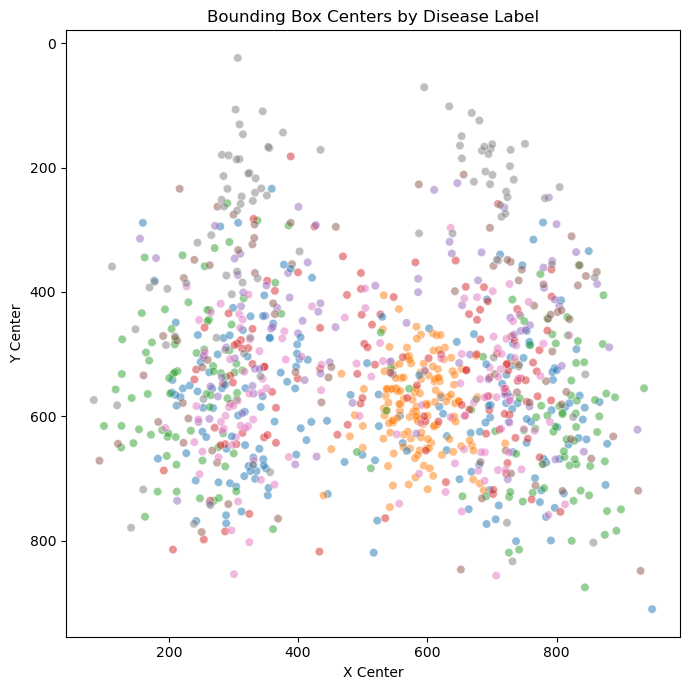

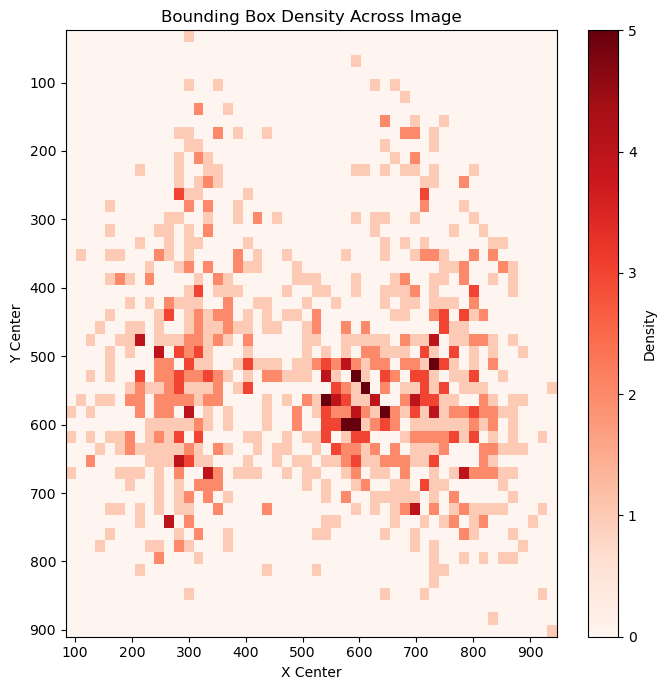

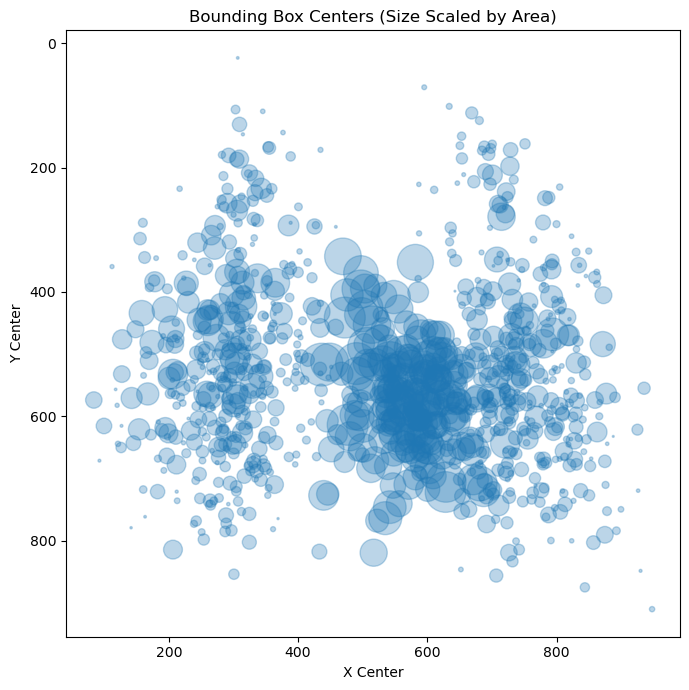

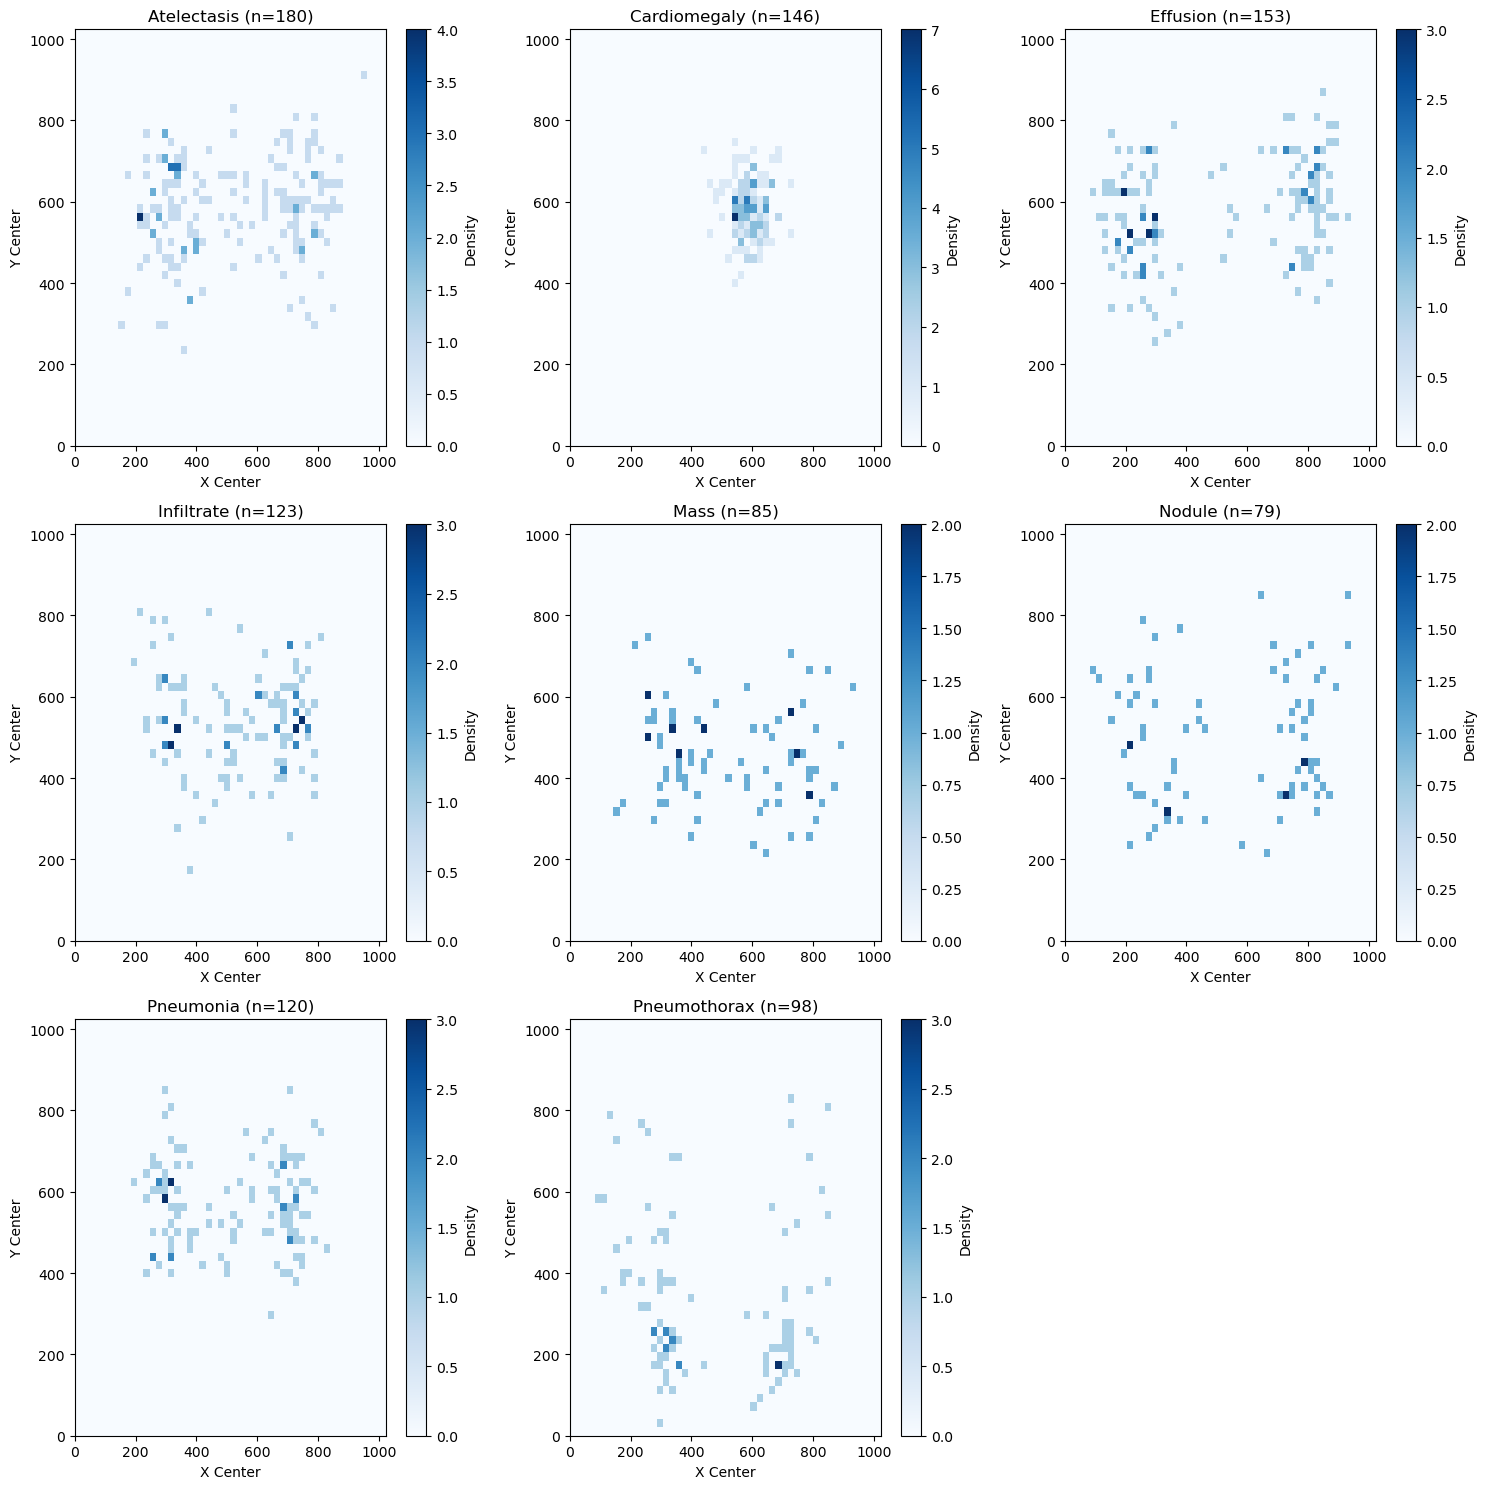

Average box sizes per disease:
                         w          h]           area
Finding Label                                       
Cardiomegaly   479.834344  381.118611  184334.513890
Infiltrate     294.044417  297.393439  101381.534391
Pneumonia      276.470519  304.486942   98815.917503
Effusion       221.624451  318.007295   72002.740565
Pneumothorax   198.881123  246.010444   54644.573347
Mass           168.686870  189.838700   44378.918083
Atelectasis    218.960376  139.110324   33508.516887
Nodule          71.942670   70.433862    5468.771150 



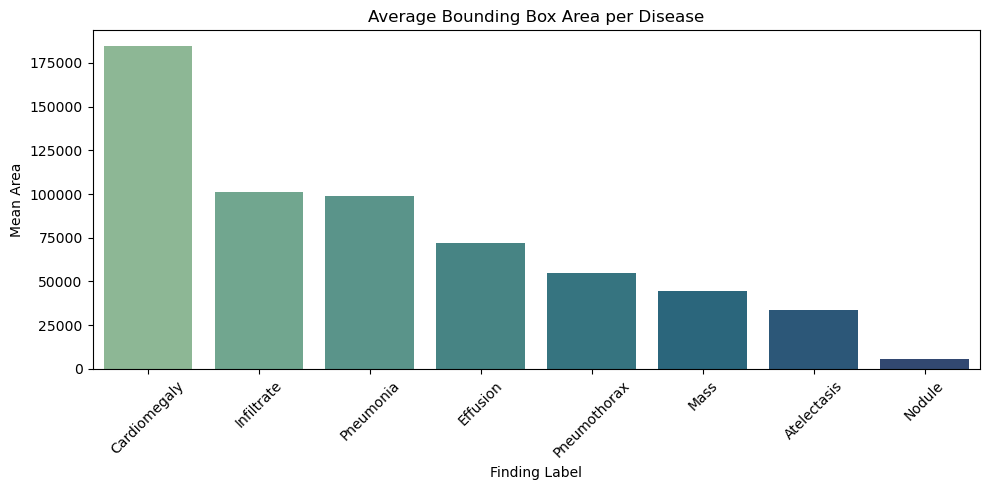

In [7]:
"""
Bbox_dataanalysis_updated.py
---------------------
Exploratory Data Analysis (EDA) and visualization for Chest X-ray bounding box data.

The dataset contains bounding boxes for thoracic diseases (e.g., Atelectasis, Fibrosis, etc.)
with columns like:
- Image Index
- Finding Label
- BBox [x, y, w, h] (bounding box coordinates and dimensions)



"""

import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------------------------
# 1. Load dataset
# --------------------------------------------------------------------
DATA_PATH = "BBox_List_2017.csv"

df = pd.read_csv(DATA_PATH)
print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
print(df.head(), "\n")

# --------------------------------------------------------------------
# 2. Basic overview
# --------------------------------------------------------------------
print("=== Dataset Info ===")
print(df.info(), "\n")

print("=== Statistical Summary ===")
print(df.describe(), "\n")

print("Unique Images:", df["Image Index"].nunique())
print("Unique Diseases:", df["Finding Label"].nunique(), "\n")
print("Disease Frequency:\n", df["Finding Label"].value_counts(), "\n")

# --------------------------------------------------------------------
# 3. Add derived features
# --------------------------------------------------------------------
df["area"] = df["w"] * df["h]"]
df["x_center"] = df["Bbox [x"] + df["w"] / 2
df["y_center"] = df["y"] + df["h]"] / 2

print("Derived columns added: area, x_center, y_center\n")
print(df[["Bbox [x", "y", "w", "h]", "area", "x_center", "y_center"]].head(), "\n")

# --------------------------------------------------------------------
# 4. Visualizations - Disease frequency
# --------------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(
    y="Finding Label",
    data=df,
    order=df["Finding Label"].value_counts().index,
    palette="viridis"
)
plt.title("Count of Disease Labels")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------
# 5. Area distribution and correlations
# --------------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df["area"], bins=40, kde=True)
plt.title("Distribution of Bounding Box Areas")
plt.xlabel("Area")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Finding Label", y="area", data=df)
plt.xticks(rotation=45)
plt.title("Bounding Box Area by Disease")
plt.tight_layout()
plt.show()

# Correlation heatmap
corr = df[["w", "h]", "area"]].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Width, Height, and Area")
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------
# 6. Filtering examples
# --------------------------------------------------------------------
big_boxes = df[df["area"] > 50000]
small_boxes = df[df["area"] < 5000]
multi_labels = df.groupby("Image Index").size()

print(f"Large boxes: {big_boxes.shape[0]}")
print(f"Small boxes: {small_boxes.shape[0]}")
print(f"Images with multiple findings: {(multi_labels > 1).sum()}\n")

# --------------------------------------------------------------------
# 7. Bounding box position analysis
# --------------------------------------------------------------------
plt.figure(figsize=(7, 7))
sns.scatterplot(
    x="x_center",
    y="y_center",
    data=df,
    alpha=0.5,
    hue="Finding Label",
    legend=False
)
plt.title("Bounding Box Centers by Disease Label")
plt.xlabel("X Center")
plt.ylabel("Y Center")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Heatmap of overall density
plt.figure(figsize=(7, 7))
plt.hist2d(df["x_center"], df["y_center"], bins=50, cmap="Reds")
plt.colorbar(label="Density")
plt.title("Bounding Box Density Across Image")
plt.xlabel("X Center")
plt.ylabel("Y Center")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Size-scaled scatter
plt.figure(figsize=(7, 7))
plt.scatter(
    df["x_center"],
    df["y_center"],
    s=df["area"] / 500,
    alpha=0.3
)
plt.title("Bounding Box Centers (Size Scaled by Area)")
plt.xlabel("X Center")
plt.ylabel("Y Center")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------
# 8. Per-disease bounding box heatmaps (with fixed scales)
# --------------------------------------------------------------------
unique_labels = df["Finding Label"].unique()
cols = 3
rows = math.ceil(len(unique_labels) / cols)

# Adjust based on your image resolution
IMG_W, IMG_H = 1024, 1024

plt.figure(figsize=(15, 5 * rows))

for i, label in enumerate(unique_labels, 1):
    subset = df[df["Finding Label"] == label]

    plt.subplot(rows, cols, i)
    plt.hist2d(
        subset["x_center"],
        subset["y_center"],
        bins=[50, 50],
        range=[[0, IMG_W], [0, IMG_H]],
        cmap="Blues"
    )
    plt.gca().invert_yaxis()
    plt.colorbar(label="Density")
    plt.title(f"{label} (n={len(subset)})")
    plt.xlabel("X Center")
    plt.ylabel("Y Center")
    plt.xlim(0, IMG_W)
    plt.ylim(0, IMG_H)

plt.tight_layout()
plt.show()

# --------------------------------------------------------------------
# 9. Per-disease average bounding box size
# --------------------------------------------------------------------
avg_sizes = (
    df.groupby("Finding Label")[["w", "h]", "area"]]
    .mean()
    .sort_values("area", ascending=False)
)

print("Average box sizes per disease:\n", avg_sizes, "\n")

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_sizes.index, y=avg_sizes["area"], palette="crest")
plt.xticks(rotation=45)
plt.title("Average Bounding Box Area per Disease")
plt.ylabel("Mean Area")
plt.tight_layout()
plt.show()
